# Hashing to identify Similiarity

two hash types
- phash - perpetual hash
- difference hash

Let's investigate deeper with security pictures


In [1]:
from PIL import Image
import numpy as np
import cv2

In [2]:
#pip install ImageHash (you need to do that in your Terminal)
import imagehash
#import scipy.spatial
from scipy.spatial import distance

In [3]:
import os

In [5]:
image_dir = '/home/jay/projects/tf20_vision_samples/cv_images'
im = []

im.append(Image.open(os.path.join(image_dir, "16076197128-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197130-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197283-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197285-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197287-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197317-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197326-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197328-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197332-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197334-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197335-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197337-1-0-c.jpg")))
im.append(Image.open(os.path.join(image_dir, "16076197339-1-0-c.jpg")))
print (type(im[0]))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [6]:
# desktop display w/ GTK (I think)
# using PIL
# im[0].show()
# im[1].show()

In [7]:
from IPython.display import Image
# display(im[0])

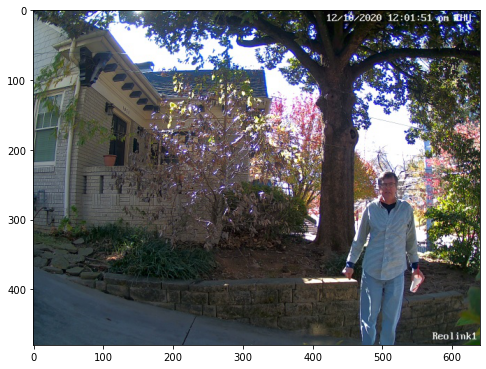

In [8]:
# from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(8, 8))
plt.imshow(np.asarray(im[0]))


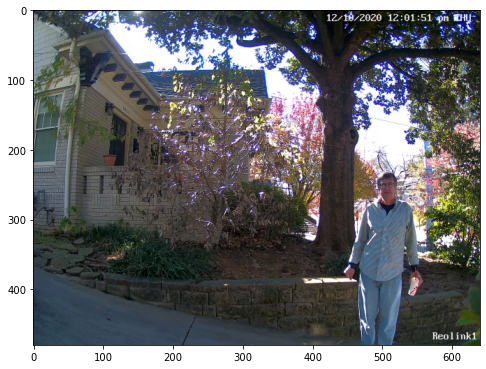

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(np.asarray(im[1]))

In [10]:
plt.figure(figsize=(8, 8))
imshow(np.asarray(im[2]))

NameError: name 'imshow' is not defined

<Figure size 576x576 with 0 Axes>

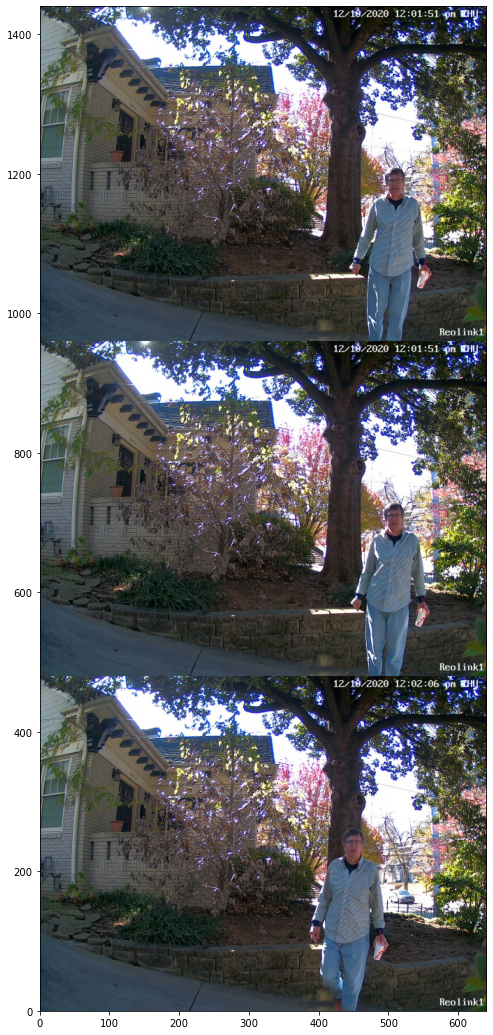

In [11]:
vert_images = np.concatenate((im[0], im[1], im[2]), axis = 0)
# imshow(vert_images, origin='lower', extent=[-4,4,-1,1], aspect=4)
plt.figure(figsize=(8, 24))

plt.imshow(vert_images, extent=[0,640,0,(480 * 3)])


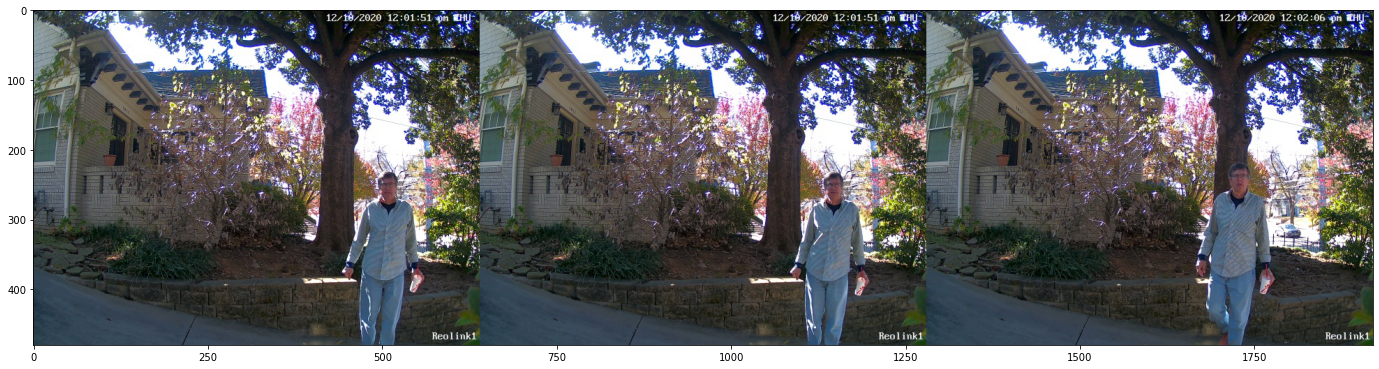

In [12]:
horiz_images = np.concatenate((im[0], im[1], im[2]), axis = 1)
plt.figure(figsize=(24, 8))
plt.imshow(horiz_images)

## Image Hash

image1 -similar- image2  (but not identical)  
image1 -shifted- image3

In [13]:
hash1 = imagehash.phash(im[0])
hash2 = imagehash.phash(im[1])
hash3 = imagehash.phash(im[2])
print (hash1, hash2, hash3)

b5cd4a62e634327a b5cd4a62e634327a b5cd4a66e436b072


In [14]:
hs1 = str(hash1)
hs2 = str(hash2)
hs3 = str(hash3)
print (hs1, hs2, hs3)

b5cd4a62e634327a b5cd4a62e634327a b5cd4a66e436b072


In [15]:
# we are doing a string compare to find difference
def hamming_distance(h1, h2):
    counter = 0
    for i in range(len(h1)):
        if h1[i] != h2[i]:
            counter += 1
    return counter

In [16]:
#print (hamming_distance(hash1,hash2)) - this needs to be commented out to avoid error: object of type 'ImageHash' has no len()
# so hash value is converted to string first

print ("hs1-hs2",hamming_distance(hs1,hs2))
print ("hs1-hs3",hamming_distance(hs1,hs3))
print ("hs2-hs3",hamming_distance(hs2,hs3))
print ("hs2-hs2",hamming_distance(hs2,hs2))

hs1-hs2 0
hs1-hs3 6
hs2-hs3 6
hs2-hs2 0


In [17]:
#note the distance.hamming function from scipy.spatial always return 1
# - doesn't make sense to me
print(distance.hamming(hash1, hash3))

1.0


In [18]:
print(distance.hamming(hs1, hs3))

1.0


### Conclusions
The shift of Jay 1 foot to his right == 6 (not much)

## Shift in background cars
*283, *285, *287  
a car is moving in the back ground, small change,   
I want to consider this to be the same image - not worth reprocessing

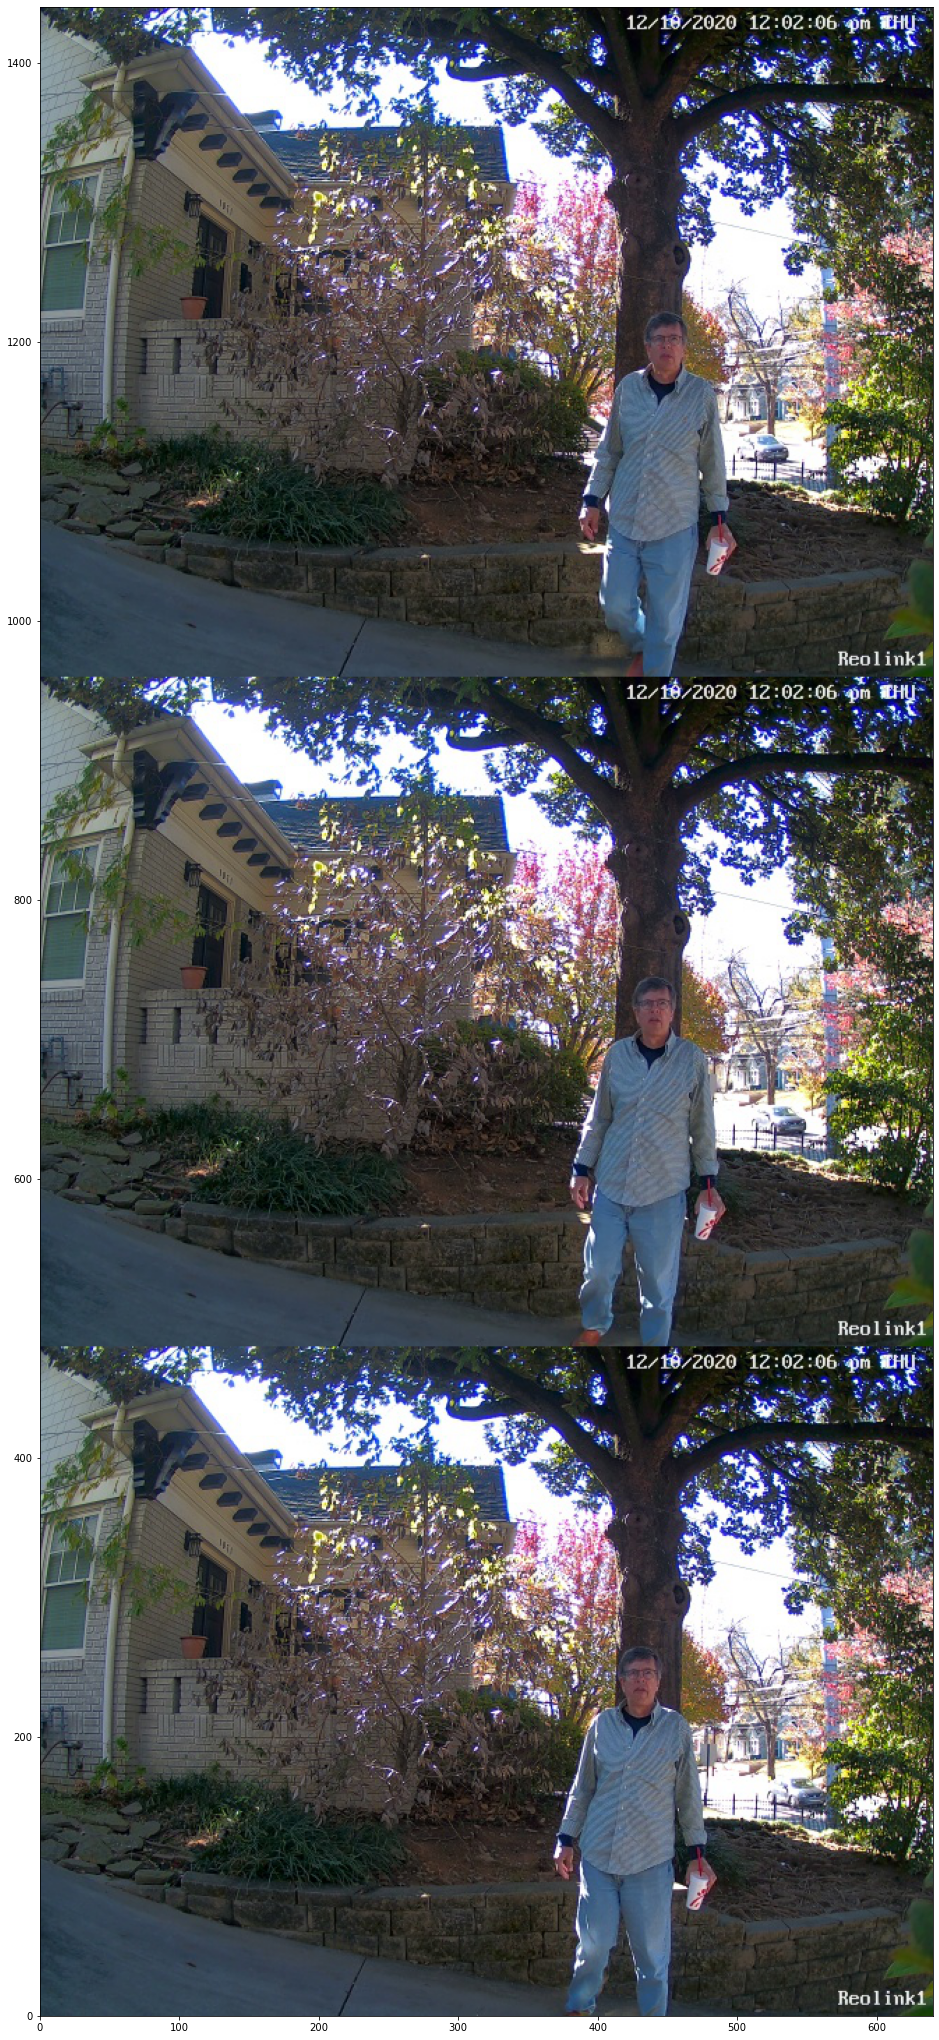

In [19]:
vert_images = np.concatenate((im[2], im[3], im[4]), axis = 0)
# imshow(vert_images, origin='lower', extent=[-4,4,-1,1], aspect=4)
plt.figure(figsize=(16, 48))

plt.imshow(vert_images, extent=[0,640,0,(480 * 3)])

In [20]:
hash1 = imagehash.phash(im[2])
hash2 = imagehash.phash(im[3])
hash3 = imagehash.phash(im[4])
print (hash1, hash2, hash3)

b5cd4a66e436b072 95cd4a66e43eb432 95cd4a66e43eb432


In [21]:
hs1 = str(hash1)
hs2 = str(hash2)
hs3 = str(hash3)
print (hs1, hs2, hs3)

b5cd4a66e436b072 95cd4a66e43eb432 95cd4a66e43eb432


In [22]:
print(distance.hamming(hash1, hash2))
print(distance.hamming(hash1, hash3))

1.0
1.0


In [23]:
print ("hs1-hs2",hamming_distance(hs1,hs2))
print ("hs1-hs3",hamming_distance(hs1,hs3))
print ("hs2-hs3",hamming_distance(hs2,hs3))
print ("hs2-hs2",hamming_distance(hs2,hs2))

hs1-hs2 4
hs1-hs3 4
hs2-hs3 0
hs2-hs2 0


# Conclusions
Maybe I need to go deeper but,  not impressed.
- string compare function looks costly
- I was expecting more detail in the image difference - ability to filter out the background movement easily.